In [11]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

from models.UW_old import UW_EffSSAM_old
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)  
yolo_ckp = "runs/detect/train4/weights/best.pt"
yolo_type = "YOLOv8"
effsam_ckp = "checkpoint/eff_sam_l0.pt"
effsam_type = "l0"
multimask_output = False
input_type = "image"
conf = 0.2

model = UW_EffSSAM_old(
    yolo_ckp=yolo_ckp,
    yolo_type=yolo_type,
    effsam_ckp=effsam_ckp,
    effsam_type=effsam_type,
    multimask_output=multimask_output,
    input_type=input_type,
    conf=conf
)

# 加载输入图像
image_path = "D:/Underwater_EffSAM/datasets/UIIS_yolo/images/train/XL_1391.jpg"
image = np.array(Image.open(image_path).convert("RGB"))
print(image.shape)

output = model([image,image])


(480, 640, 3)


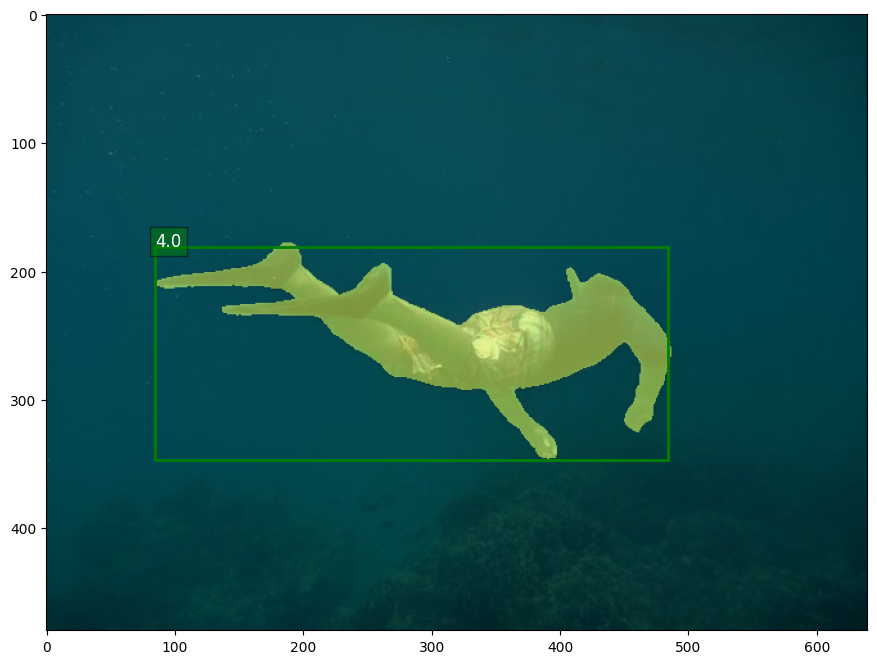

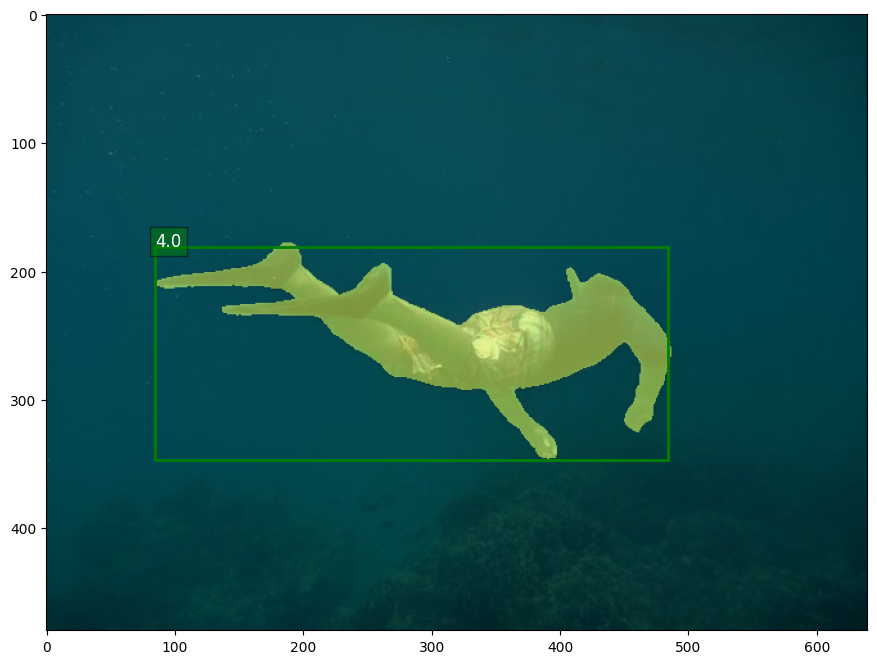

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 加载并预处理图像的函数
def load_image(image_path):
    from PIL import Image
    from torchvision import transforms
    import torch
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)  

def plot_results_from_output(output):
    cmap = plt.get_cmap('viridis')  
    for image_result in output:
        image = np.array(image_result['images'])
        masks = np.array(image_result['masks'])
        boxes = np.array(image_result['boxes'])
        labels = image_result['labels']

        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        
        if image.shape[0] == 3:  
            image = image.transpose(1, 2, 0)
        
        ax.imshow(image)
        
        unique_classes = np.unique(masks)
        colored_mask = np.zeros((*masks.shape, 3), dtype=np.float32)
        
        for cls in unique_classes:
            if cls == 0:
                continue  
            color = cmap(cls / len(unique_classes))[:3]
            colored_mask[masks == cls] = color

    
        masks_expanded = np.repeat(masks[:, :, np.newaxis], 3, axis=2)
        masked_colored_mask = np.ma.masked_where(masks_expanded == 0, colored_mask)

        ax.imshow(masked_colored_mask, alpha=0.5)  
        for box, label in zip(boxes, labels):
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='green', facecolor='none', linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1, str(label), color='white', fontsize=12, bbox=dict(facecolor='green', alpha=0.5))
        
        plt.show()
plot_results_from_output(output)
